# JFC #1 Processing Sandbox

In [1]:
# Standard packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib as mpl
import numpy as np
import pandas as pd
import os.path as path
import datetime as dt
import warnings
import seaborn as sb
import cosmicsense as cs
import glob
import os

In [2]:
warnings.simplefilter('once', RuntimeWarning)

In [3]:
# Display figures inline
%matplotlib inline
# Display figures as interactive (requires kernel restart)
#%matplotlib

### Collecting meteo data

From DWD at Hohenpeißenberg:
- Precipitation: ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/precipitation/recent/stundenwerte_RR_02290_akt.zip
- Temperature and humidity: ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/air_temperature/recent/stundenwerte_TU_02290_akt.zip
- Pressure: ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/pressure/recent/stundenwerte_P0_02290_akt.zip

In [4]:
f_prec = "/media/x/cosmicsense/data/fendt/dwd/stundenwerte_RR_02290_akt.txt"
prec = pd.read_csv(f_prec, sep=";", na_values=-999)
prec.columns = ["station_id", "datetime", "quality", "depth", "ind", "wrtr", "eor"]
prec.datetime = pd.to_datetime(prec.datetime, format="%Y%m%d%H")
prec = prec.set_index("datetime")

In [5]:
f_press = "/media/x/cosmicsense/data/fendt/dwd/stundenwerte_P0_02290_akt.txt"
press = pd.read_csv(f_press, sep=";", na_values=-999)
press.columns = ["station_id", "datetime", "quality", "p", "p0", "eor"]
press.datetime = pd.to_datetime(press.datetime, format="%Y%m%d%H")
press = press.set_index("datetime")

In [6]:
f_temphum = "/media/x/cosmicsense/data/fendt/dwd/stundenwerte_TU_02290_akt.txt"
temphum = pd.read_csv(f_temphum, sep=";", na_values=-999)
temphum.columns = ["station_id", "datetime", "quality", "temp2m", "relhum2m", "eor"]
temphum.datetime = pd.to_datetime(temphum.datetime, format="%Y%m%d%H")
temphum = temphum.set_index("datetime")

In [7]:
f_meteo = "/media/x/cosmicsense/data/fendt/meteo/2019_metDataDE-Fen.dat"
names = ["datetime","temp2m","press2m","relhum2m","windsp2m","winddir2m","swdownrad2m","lwdownrad2m","precip"]
meteo = pd.read_csv(f_meteo, sep=",", skiprows=2, names=names)
meteo.datetime = pd.to_datetime(meteo.datetime)
meteo = meteo.set_index("datetime")
meteo.index = meteo.index.tz_convert(None)

In [8]:
meteo["abshum2m"] = cs.conv.absolute_humidity(meteo.temp2m, meteo.relhum2m)
temphum["abshum2m"] = cs.conv.absolute_humidity(temphum.temp2m, temphum.relhum2m)

/home/maik/miniconda3/envs/cosmic-sense/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(737180.3520833333, 737282.6062500001)

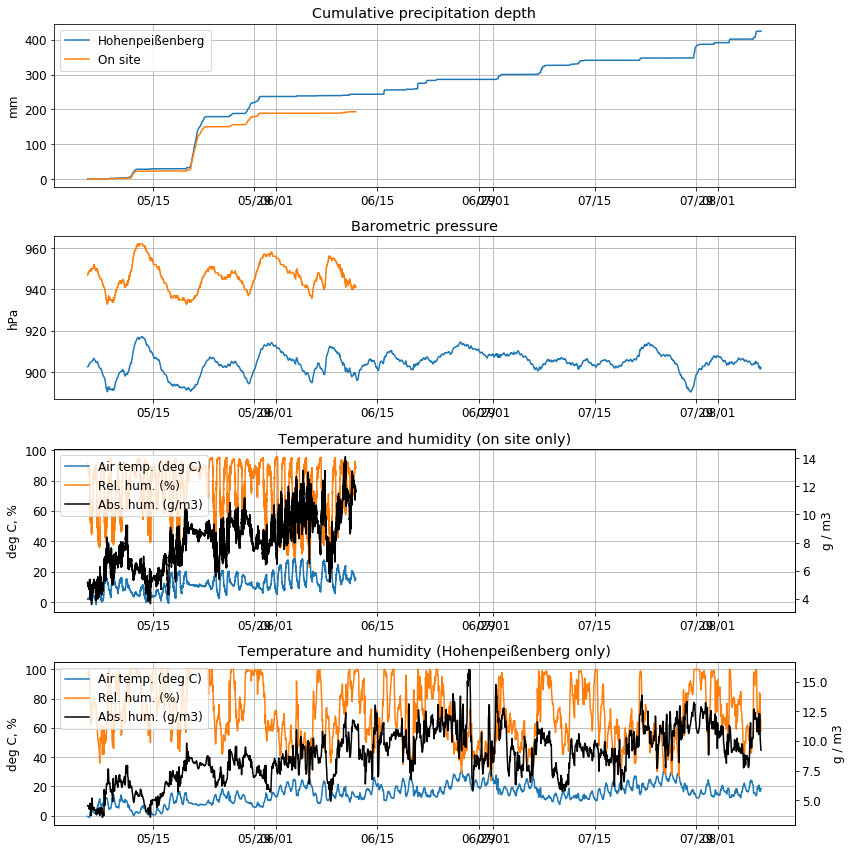

In [9]:
plt.rc('font', **{'size'   : 12})
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(411)
plt.plot(prec["2019-05-06":].index, prec["2019-05-06":].depth.cumsum(), label="Hohenpeißenberg")
plt.plot(meteo["2019-05-06":].index, meteo["2019-05-06":].precip.cumsum(), label="On site")
#prec["2019-05-06":].depth.cumsum().plot()
plt.grid() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title("Cumulative precipitation depth")
plt.legend()
plt.ylabel("mm")
xlim = ax.get_xlim()
ax = plt.subplot(412)
plt.plot(press["2019-05-06":].index, press["2019-05-06":].p0, label="Hohenpeißenberg")
plt.plot(meteo["2019-05-06":].index, meteo["2019-05-06":].press2m, label="On site")
plt.grid() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title("Barometric pressure")
plt.ylabel("hPa")
ax = plt.subplot(413)
#plt.plot(press["2019-05-06":].index, press["2019-05-06":].p0, label="Hohenpeißenberg")
templ = plt.plot(meteo["2019-05-06":].index, meteo["2019-05-06":].temp2m, label="Air temp. (deg C)")
rehumpl = plt.plot(meteo["2019-05-06":].index, meteo["2019-05-06":].relhum2m, label="Rel. hum. (%)")
plt.grid()
plt.ylabel("deg C, %")
ax2 = ax.twinx()
abshumpl = plt.plot(meteo["2019-05-06":].index, meteo["2019-05-06":].abshum2m, color="black", label="Abs. hum. (g/m3)")
lns = templ+rehumpl+abshumpl
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper left")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title("Temperature and humidity (on site only)")
plt.ylabel("g / m3")
plt.tight_layout()
ax.set_xlim(xlim)

ax = plt.subplot(414)
templ = plt.plot(temphum["2019-05-06":].index, temphum["2019-05-06":].temp2m, label="Air temp. (deg C)")
rehumpl = plt.plot(temphum["2019-05-06":].index, temphum["2019-05-06":].relhum2m, label="Rel. hum. (%)")
plt.grid()
plt.ylabel("deg C, %")
ax2 = ax.twinx()
abshumpl = plt.plot(temphum["2019-05-06":].index, temphum["2019-05-06":].abshum2m, color="black", label="Abs. hum. (g/m3)")
lns = templ+rehumpl+abshumpl
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper left")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title("Temperature and humidity (Hohenpeißenberg only)")
plt.ylabel("g / m3")
plt.tight_layout()
ax.set_xlim(xlim)

## Read raw data

#### Read sensor metadata

In [10]:
attrs = pd.read_csv("jfc1table.csv", sep=";")
attrs = attrs.set_index("id")
attrs["id"] = attrs.index
attrs.calstart = pd.to_datetime(attrs.calstart)
attrs.calend = pd.to_datetime(attrs.calend)
attrs

,institution,type,lon,lat,hasdata,hascal,calstart,calend,mincph,maxcph,id
id,,,,,,,,,,,
1,UP,CRS 2000-B,11.064395,47.825464,True,False,1900-01-01 00:00:00,1900-01-01 00:00:00,500,1000,1
2,UP,CRS 1000,11.061651,47.826620,True,False,1900-01-01 00:00:00,1900-01-01 00:00:00,500,1100,2
3,UP,CRS 1000,11.059494,47.831677,True,False,1900-01-01 00:00:00,1900-01-01 00:00:00,500,1100,3
4,UP,Lab-C,11.061457,47.823908,True,True,2019-05-28 09:45:00,2019-05-29 09:25:00,6000,9500,4
5,KIT,CRS 1000-B,11.063310,47.828752,True,True,2019-05-29 12:20:00,2019-05-31 08:35:00,800,1500,5
6,KIT,CRS 1000-B,11.064491,47.822520,True,False,1900-01-01 00:00:00,1900-01-01 00:00:00,800,1500,6
7,KIT,CRS 1000-B,11.059960,47.828184,True,False,1900-01-01 00:00:00,1900-01-01 00:00:00,1000,1700,7
8,KIT,CRS 2000-B,11.060487,47.832478,True,True,2019-06-04 16:00:00,2019-06-05 11:53:00,1300,2500,8
9,UFZ,Styx Neutronica,11.066562,47.828935,False,True,2019-07-09 10:33:00,2019-07-10 13:08:00,-9999,-9999,9


#### Read sensor data

In [11]:
fpath = "/media/x/cosmicsense/data/fendt/crns/"
crns = {}
for id in attrs.index:
    if not attrs.loc[id,"hasdata"]:
        continue
    df = pd.read_csv(path.join(fpath, "%d/%d_CRNS_merge.txt" % (id, id)), sep="\t")
    df.datetime = pd.to_datetime(df.datetime)
    df = df.set_index("datetime")
    if id==4:
        df["cph1"] = (df.counts1 + df.counts2) / cs.conv.s_to_h(df.nsecs1)
    else:
        df["cph1"] = df.counts1 / cs.conv.s_to_h(df.nsecs1)
        try:
            df["cph2"] = df.counts2 / cs.conv.s_to_h(df.nsecs2)
        except AttributeError:
            pass
    print(id, end=": ")
    print("%s to %s" % (df.index[0], df.index[-1]) )
    crns[id] = df

1: 2019-05-09 09:59:00 to 2019-08-06 06:41:00
2: 2019-05-07 11:02:13 to 2019-08-06 08:46:30
3: 2019-05-07 08:37:25 to 2019-07-16 10:26:00
4: 2019-05-07 15:21:29 to 2019-07-16 13:19:00
5: 2019-05-03 08:53:04 to 2019-07-19 09:29:00
6: 2019-05-03 09:34:48 to 2019-07-19 07:05:00
7: 2019-05-13 14:54:00 to 2019-07-19 09:20:00
8: 2019-05-01 00:46:00 to 2019-07-22 11:46:00
14: 2019-05-08 06:45:44 to 2019-05-31 09:19:00
16: 2019-05-14 13:45:00 to 2019-07-16 16:31:00
17: 2019-05-15 14:14:46 to 2019-07-16 11:46:00
18: 2019-05-03 13:22:22 to 2019-07-17 08:24:00
19: 2019-05-14 12:45:49 to 2019-07-17 12:25:00
21: 2019-05-13 13:38:38 to 2019-07-16 04:17:00
22: 2019-05-13 15:24:44 to 2019-07-15 09:45:00
23: 2019-05-15 15:55:32 to 2019-07-17 04:19:00
24: 2019-05-15 15:09:58 to 2019-07-16 12:39:00
25: 2019-05-14 10:02:00 to 2019-07-19 09:01:00


In [12]:
min_dtime = np.min([crns[key].index[0] for key in crns.keys()])
max_dtime = np.max([crns[key].index[-1] for key in crns.keys()])
print(min_dtime, "-", max_dtime)
# Set max_dtime
max_dtime = dt.datetime(2019, 7, 23)

2019-05-01 00:46:00 - 2019-08-06 08:46:30


### Get calibrator data

crnsdir = "/home/maik/b2drop/cosmicsense/inbox/fendt/timeseries/crns/JFC-1-sd/20"
tmpfile = "tmpcal"
try:
    os.remove(tmpfile)
except:
    pass
for name in glob.glob(crnsdir+'/**/*'+".cal", recursive=True):
    print("\t", name)
    fin = open(name, "r")
    body = fin.read()
    # replace comment character
    body = body.replace("//", "#")
    # replace zombie line endings
    body = body.replace(",\r\n", "\r\n")
    body = body.replace(",\n", "\n")
    #body = body.replace(",\r", "\r")
    # comment out these lines
    body = body.replace("NPM#1:", "#NPM#1")
    body = body.replace("NPM#2:", "#NPM#2")
    myfile = open(tmpfile, 'a')
    myfile.write(body)
    myfile.close()

cal = pd.read_csv(tmpfile, sep=",", comment="#", header=None, error_bad_lines=False, warn_bad_lines=True)
cal.columns = ["rec_id", "datetime", "pressx", "press1", "press4", "temp1", "relhum1", "volt", "counts1", "nsecs1", "counts2", "nsecs2"]
cal.datetime = pd.to_datetime(cal.datetime, format="%Y/%m/%d %H:%M:%S")
cal = cal.set_index("datetime")
cal.insert(loc=1, column="datetime", value=cal.index)
cal = cal.sort_index()
cal = cal[cal.index >= "2019-05-01"]
dupl = cal.index.duplicated(keep='first')
if np.any(dupl):
    print("Contains %d duplicates" % len(np.where(dupl)[0]))
    cal = cal[~dupl]
fpath = "/home/maik/b2drop/cosmicsense/inbox/fendt/timeseries/crns/JFC-1-sd/20/cal.txt"
cal.to_csv(fpath, sep="\t", index=False, date_format="%Y-%m-%d %H:%M:%S")  

In [13]:
cal = pd.read_csv("/home/maik/b2drop/cosmicsense/inbox/fendt/timeseries/crns/JFC-1-sd/20/cal.txt", sep="\t")
cal.datetime = pd.to_datetime(cal.datetime)
cal = cal.set_index("datetime")
# Accounting for counts in both tubes
cal["cph1"] = (cal.counts1 + cal.counts2) / cs.conv.s_to_h(cal.nsecs1)
#cal["cph2"] = cal.counts2 / cs.conv.s_to_h(cal.nsecs2)
cal["id"] = -9999
for id in attrs[attrs.hascal].id:
    cal.loc[attrs.loc[id,"calstart"]:attrs.loc[id,"calend"], "id"] = id

In [14]:
calavgcph = cal.groupby('id', as_index=False)['cph1'].mean()

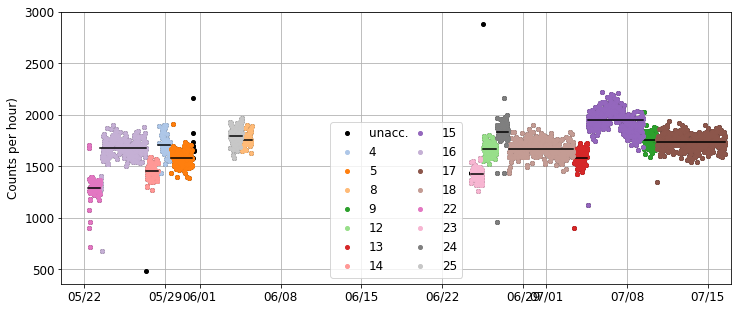

In [15]:
plt.rc('font', **{'size'   : 12})
colors = plt.cm.tab20(range(len(calavgcph)))
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
plt.plot(cal.index, cal.cph1, linewidth=0, marker=".", color="black", ms=8, label="unacc.")
plt.grid()
plt.xlim(dt.datetime(2019,5,20), dt.datetime(2019,7,17))
#plt.ylim(250, 1250)
for i,id in enumerate(calavgcph.id):
    if not id==-9999:
        plt.plot(cal[cal.id==id].index, cal[cal.id==id].cph1, linewidth=0, marker=".", ms=8, color=colors[i], label=str(id))
        plt.plot(attrs.loc[id,["calstart", "calend"]], np.repeat(calavgcph[calavgcph.id==id].cph1, 2), color="black", label="_tmp")
plt.legend(ncol=2, columnspacing=0.001)
plt.ylabel("Counts per hour)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

## Filter spurious signals

Some probes are affected by spurious count rates. In order to keep useful parts of the signal, a pragmatic/heuristic filtering approach is applied which could be refined later:

1. Remove entirely unrealisticly count rates for specific probes (`mincph`, `maxcph`)
2. Remove count rates from spuriously short count intervals (`mininterv`)
3. After that, there are still spurious count rates.In order to detect these, we compute the maximum count rates over periods of six hours, and then apply a 24-hour-median filter to these 6-hour-maxima. That way, we try to truncate spurios peaks. In order to prevent too aggressive filtering, we add a `buffer` of the median count rates over a period of 24 hours.
4. We then interpolate this upper limit filter to the original timestamp values and use it to remove high values.
5. We remove unrealisticly low count rates (`mincph`), and than apply the same approach (points 3-4) to eliminate spuriously small values.  

In [20]:
buffer = 0.075
mininterv = 600

for i, key in enumerate(crns.keys()):
    x = crns[key].cph1.copy()
    # Today's specials
    if not key==1:
        #x[x > pars[key]["maxcph"]] = np.nan
        x[x > attrs.loc[key, "maxcph"]] = np.nan
    if key==1:
        x[:"2019-06-06 09:00:00"] = np.nan
    if key==2:
        # Weird behaviour
        x["2019-06-25 10:00:00":"2019-06-25 20:00:00"] = np.nan
        x["2019-06-26 10:00:00":"2019-06-26 20:00:00"] = np.nan
    #x[x < pars[key]["mincph"]] = np.nan
    x[x < attrs.loc[key, "mincph"]] = np.nan        
    x[crns[key].nsecs1 < mininterv] = np.nan
    median24 = x.resample("24H").median()
    # Maxfilter
    max6 = x.resample("6H").max()
    median24max6 = max6.resample("24H").median()
    maxfilter = np.array(median24max6 + buffer * median24)
    # Minfilter
    min6 = x.resample("6H").min()
    median24min6 = min6.resample("24H").median()
    minfilter = np.array(median24min6 - buffer * median24)    
    # Resample filter to original time stamps
    crns[key]["cph1_maxfilter"] = np.interp(x.index, median24.index, maxfilter)
    crns[key]["cph1_minfilter"] = np.interp(x.index, median24.index, minfilter)
    # Fill gaps
    crns[key]["cph1_maxfilter"] = crns[key].cph1_maxfilter.interpolate()
    crns[key]["cph1_minfilter"] = crns[key].cph1_minfilter.interpolate()
    # Apply filter
    crns[key]["cph1_filtered"] = x
    if not key==1:
        crns[key].loc[crns[key].cph1 > crns[key].cph1_maxfilter, "cph1_filtered"] = np.nan
        crns[key].loc[crns[key].cph1 < crns[key].cph1_minfilter, "cph1_filtered"] = np.nan

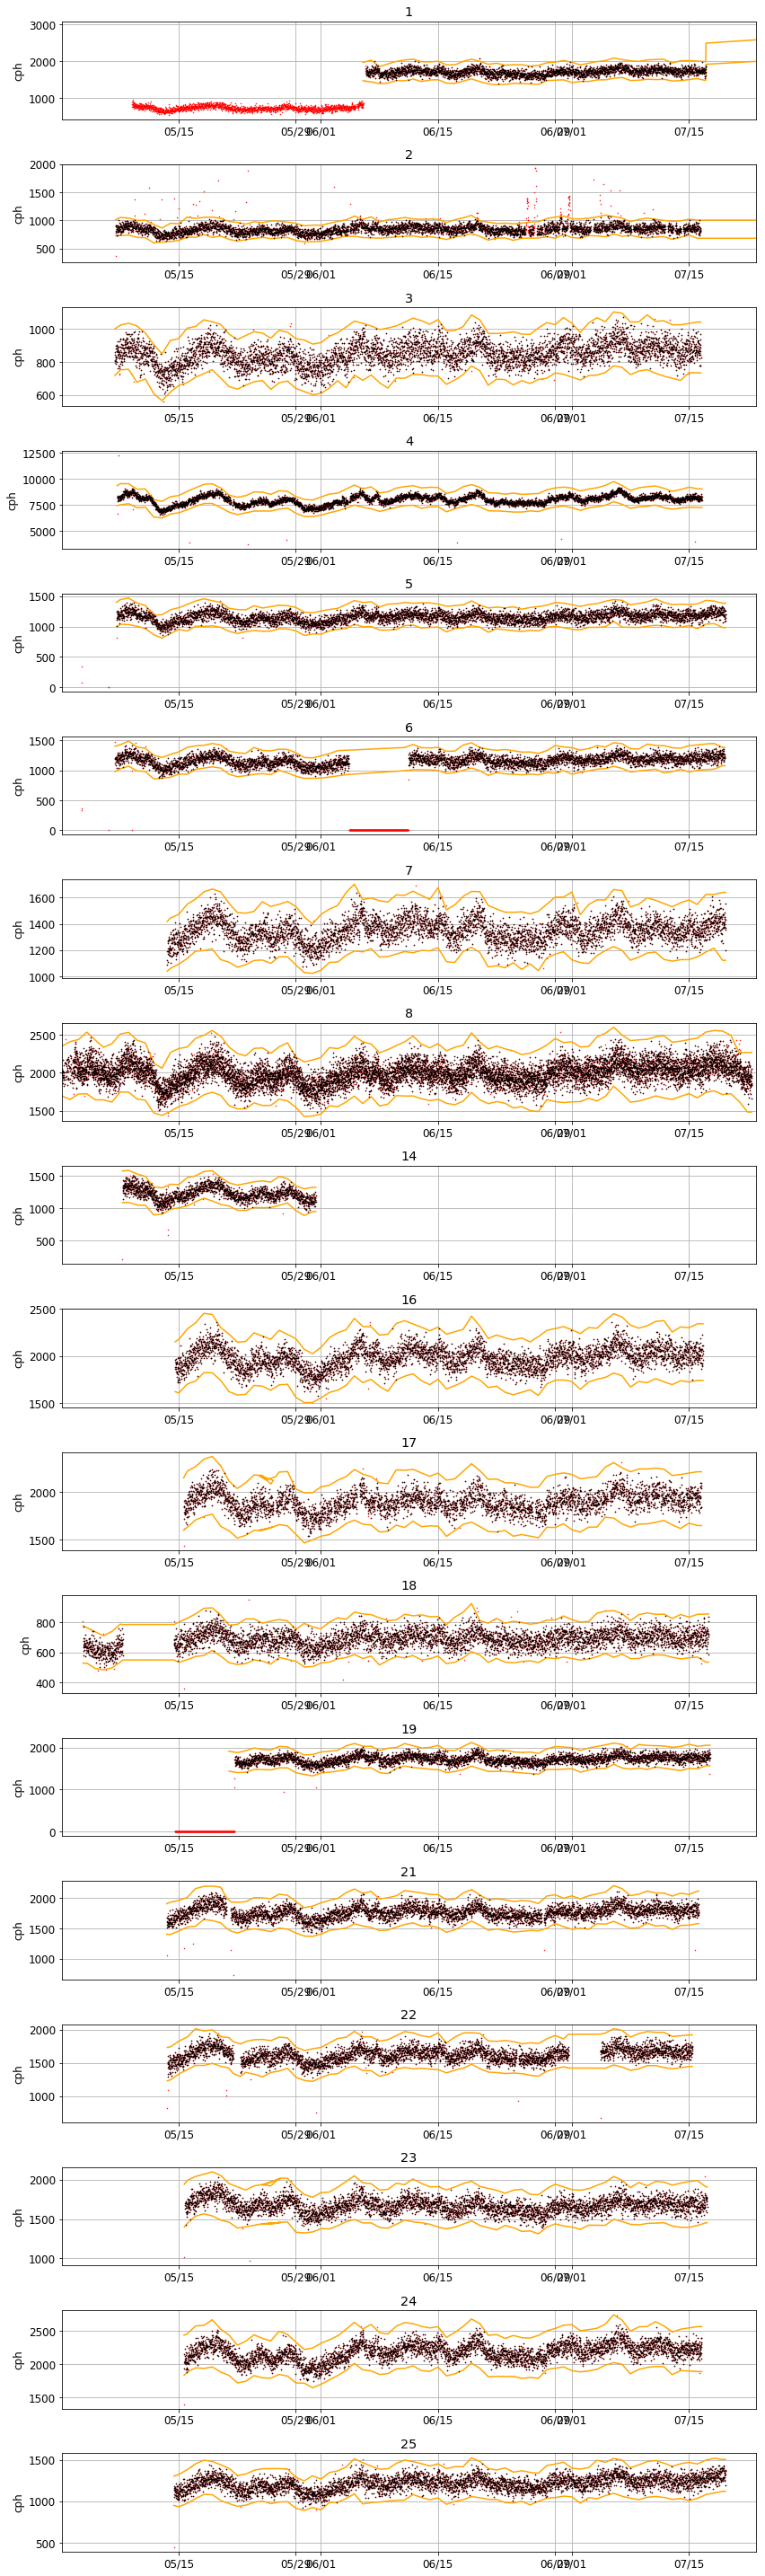

In [21]:
plt.rc('font', **{'size'   : 12})
fig, ax = plt.subplots(nrows=len(crns), figsize=(12,40))

xlim = min_dtime, dt.datetime(2019,7,23)#max_dtime

for i, key in enumerate(crns.keys()):
    ax[i].plot(crns[key].index, crns[key].cph1, linestyle="None", marker=".", ms=1, color="red")
    ax[i].plot(crns[key].index, crns[key].cph1_maxfilter, linestyle="-", ms=0, color="orange")
    ax[i].plot(crns[key].index, crns[key].cph1_minfilter, linestyle="-", ms=0, color="orange")
    ax[i].plot(crns[key].index, crns[key].cph1_filtered, linestyle="None", marker=".", ms=1, color="black")
    ax[i].set_title(key)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("cph")
    ax[i].set_xlim(xlim)
    if key==2:
        ax[i].set_ylim(250,2000)
    #ax[i].set_ylim(pars[key]["mincph"], pars[key]["maxcph"]+200)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax[i].grid()
    #ax[i].legend()    
    
plt.tight_layout()

### Calibrate sensitivity

In [22]:
calfacts = {"CRS 1000": np.array([]), "CRS 1000-B": np.array([]), "CRS 2000": np.array([]),
            "CRS 2000-B": np.array([]), "Lab-C": np.array([]), "Styx Neutronica": np.array([])}
attrs["calfact"] = np.nan
for id in attrs[attrs.hascal & attrs.hasdata].id:
    #if (calperiods[id] is not None) and (id in ids): 
    probeavg = np.nanmean(crns[id][str(attrs.loc[id,"calstart"]):str(attrs.loc[id,"calend"])].cph1)
    ratio = float(probeavg / calavgcph[calavgcph.id==id].cph1)
    attrs.loc[id,"calfact"] = ratio
    calfacts[attrs.loc[id, "type"]] = np.append(calfacts[attrs.loc[id, "type"]], ratio)
for key in calfacts.keys():
    print("%s: %s, mean factor: %.2f" % (key, calfacts[key], np.mean(calfacts[key])) )
for id in attrs[~attrs.hascal & attrs.hasdata].id:
    attrs.loc[id,"calfact"] = np.mean(calfacts[attrs.loc[id,"type"]])

CRS 1000: [0.41384577], mean factor: 0.41
CRS 1000-B: [0.66976865 0.66672533], mean factor: 0.67
CRS 2000: [0.86784024], mean factor: 0.87
CRS 2000-B: [1.16019181 1.15452175 1.12142657 1.17854832 1.12683947 1.14872401], mean factor: 1.15
Lab-C: [4.57200926], mean factor: 4.57
Styx Neutronica: [], mean factor: nan


/home/maik/miniconda3/envs/cosmic-sense/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/maik/miniconda3/envs/cosmic-sense/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
for id in crns.keys():
    crns[id]["cph1cal"] = crns[id]["cph1_filtered"] / attrs.loc[id, "calfact"]

## Resample to uniform 20 minute interval via nearest neighbour

In [24]:
dtrange = pd.date_range('2019-05-01 00:00:00', max_dtime, freq="20T")
crns20 = pd.DataFrame({}, index=dtrange)

for i, key in enumerate(crns.keys()):
    crns20[key] = crns[key].cph1cal.resample('20T').nearest(limit=1).reindex(dtrange)

In [25]:
#pp = sb.pairplot(crns20)

## Correcting for variations in incoming neutron flux

#### NMBD station data

`nmdb.txt` contains reference (background) neutron count rates from [NMDB](http://www.nmdb.eu/nest/), for stations `KIEL2`, `JUNG`, `JUNG1`, and `DRBS` (Dourbes, Belgium). 

In [26]:
# NMDB data
nmdb = pd.read_csv("/media/x/cosmicsense/data/fendt/nmdb/nmdb.txt", sep=";", comment="#", na_values="   null")
nmdb.datetime = pd.to_datetime(nmdb.datetime)
nmdb = nmdb.set_index("datetime")

Text(0.5, 1.0, 'Incoming neutron flux at Jungfraujoch')

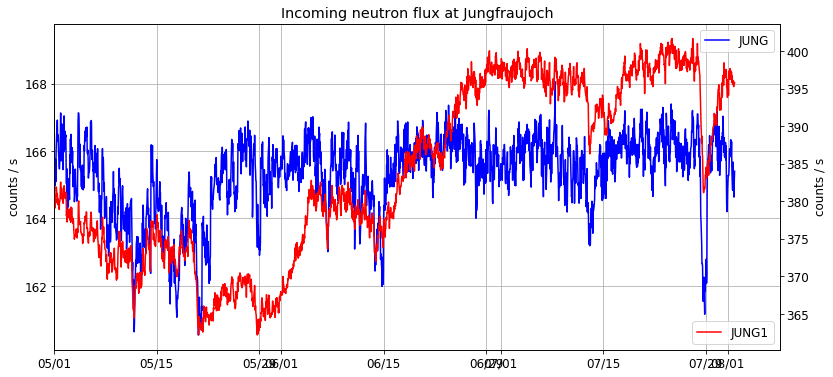

In [27]:
fig, ax1 = plt.subplots(figsize=(13, 6))
plt.plot(nmdb.index, nmdb.JUNG, "b-", label="JUNG")
plt.ylabel("counts / s")
plt.legend()
plt.grid()

ax2 = ax1.twinx()
plt.plot(nmdb.index, nmdb.JUNG1, "r-", label="JUNG1")
plt.ylabel("counts / s")
leg = plt.legend(loc="lower right")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.title("Incoming neutron flux at Jungfraujoch")

Several literature references (e.g. Zreda et al. 2012, Schroen et al. 2015, Andreasen et al. 2017) suggest to correct for variations in incoming neutron fluxes based on cosmic-ray neutron monitors available through http://www.nmdb.eu/nest. The idea is to compute a simple scaling factor $f_i$ based on measure neutron intensity $f_m$ and an arbitrary reference intensity $f_{ref}$ that depends on the actual neutron monitor.

\begin{equation*}
f_i = \frac{I_m}{I_{ref}}
\end{equation*}

In the dissertation thesis of Schroen (2016), a reference value $f_{ref}$ of 150 cps is suggested for the monitor on Jungfraujoch (JUNG).

In [28]:
fi = (nmdb.JUNG / nmdb.JUNG.mean())
fi.name="fi"
fi = fi.resample("1H").mean().resample("20T").ffill().reindex(dtrange)
fi2 = (nmdb.JUNG1 / nmdb.JUNG1.mean())
fi2.name="fi2"
fi2 = fi2.resample("1H").mean().resample("20T").ffill().reindex(dtrange)

## Correcting for variations in barometric pressure

Again based on Zreda et al. (2012), Andreasen et al. (2017) and many others, a correction factor $f_p$ is suggested in order to account for variations in barometric pressure.

\begin{equation*}
f_p = exp\Bigl(\frac{p_0 - p}{L}\Bigl)
\end{equation*}

Quoting from [Andreasen et al. (2017)](https://dl.sciencesocieties.org/publications/vzj/pdfs/16/8/vzj2017.04.0086):

> [...] $L$  is  the  mass  attenuation  length  for  high-energy  neutrons and is a function of cutoff rigidity
> (Desilets et al., 2006), $p$ is the barometric pressure at the time of measurement, and $P_0$ is an arbitrary
> reference pressure. Note that the units of $L$, $p$, and $p_0$ can be shielding depth (g/cm2) or pressure (Pa), 
> where $1 g/cm2 = 98.0665 Pa$. If shielding depth is used, $L$ ranges from 130 g/cm2 at high latitudes to 
> 144 g/cm2 at the equator (see Fig. 1).

[Zreda et al. (2012)](https://www.hydrol-earth-syst-sci.net/16/4079/2012/hess-16-4079-2012.pdf) complement that

> [... $p_0$] can be selected to be the long-term average pressure at the specific site, sea-level pressure, 
> or long-term averagepressure at a different reference site.

For $p_0$, we use $p_0 = 1013.25 mbar = 101325 Pa = 1033.23 g/cm²$ or the site average pressure, and $L=131.6$ for Germany (Fig. 1 in Andreasen et al. (2017).

In [29]:
p_0 = press.p0.mean()
L = 131.6 # g/cm2
fp = cs.core.corrfact_baro(press.p0, p_0, L)
fp = fp.resample("20T").ffill().reindex(dtrange)
fp.name="fp"

In [30]:
fp2 = cs.core.corrfact_baro(meteo.press2m, meteo.press2m.mean(), L)
fp2 = fp2.resample("20T").ffill().reindex(dtrange)
fp2.name="fp2"

## Correcting for variations in atmospheric water vapor

In their overview, Andreasen et al. (2017) refer to Rosolem et al. (2013) when accounting for the effects of atmospheric water vapor:

\begin{equation*}
f_{wv} = 1 + 0.0054 * (h - h_{ref})
\end{equation*}

where $h$ is the absolute humidity of the air (in g/m3), and $h_{ref}$ is the absolute humidity at an arbitrary reference time.

The references do not elaborate on how to obtain the absolute humidity, but given the relative humidity and air temperature, we typically obtain $h$ by combining 

1. Relationship between vapor pressure $e$, saturated vapor pressure $e_s$ and relative humidity $rh$ (in %)

\begin{equation*}
e = e_s * rh / 100.
\end{equation*}

2. August-Roche-Magnus approximation of relation betweeen $e_s$ (mbar) and air temperature $T$ (in deg C) 

\begin{equation*}
e_s(T) = 6.1094 * exp\Bigl(\frac{17.625*T}{T + 243.04}\Bigl)
\end{equation*}

3. Universal law of perfect gases (with volume $V$, mass $m$, specific gas constant $R_S=461.4 J/kg/K$ for water vapor)

\begin{equation*}
e * V = m * R_s * T
\end{equation*}

In [31]:
fwv2 = cs.core.corrfact_vapor_rosolem(meteo.abshum2m)
fwv2.name = "fwv2"
fwv = cs.core.corrfact_vapor_rosolem(temphum.abshum2m)
fwv.name = "fwv"
fwv = fwv.resample("20T").ffill().reindex(dtrange)

## Combining the correction factors

We can now inspect the different correction factor, and use them to correct our neutron counts. According to Andreasen, this is done via

\begin{equation*}
N_{cor} = \frac{N*f_{wv}}{f_p*f_i}
\end{equation*}

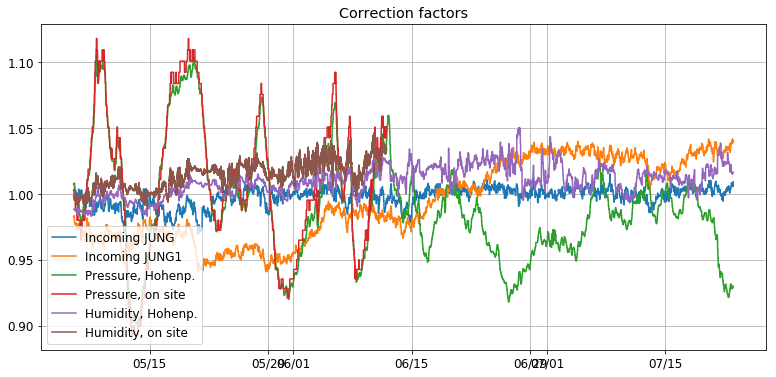

In [32]:
plt.rc('font', **{'size'   : 12})
fig = plt.figure(figsize=(13, 6))
ax = plt.subplot(111)
plt.plot(fi["2019-05-06":].index, fi["2019-05-06":], label="Incoming JUNG")
plt.plot(fi2["2019-05-06":].index, fi2["2019-05-06":], label="Incoming JUNG1")
plt.plot(fp["2019-05-06":].index, fp["2019-05-06":], label="Pressure, Hohenp.")
plt.plot(fp2["2019-05-06":].index, fp2["2019-05-06":], label="Pressure, on site")
plt.plot(fwv["2019-05-06":].index, fwv["2019-05-06":], label="Humidity, Hohenp.")
plt.plot(fwv2["2019-05-06":].index, fwv2["2019-05-06":], label="Humidity, on site")
#prec["2019-05-06":].depth.cumsum().plot()
plt.grid() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.title("Correction factors")
plt.legend(loc="lower left")

Using `JUNG1` minimizes the standard deviation of counts as compared to `JUNG` so we use `fi2` for now.

In [33]:
crns20c = crns20.copy()
for id in crns20c.keys():
    crns20c[id] = crns20c[id] * fwv / (fi * fp)

### Standardize all probes to one level (adjust to probe #4 - Lab C)

We standardize the count rates of all probes to the level of the Lab C probe.

crns20cst = crns20c.copy()
#crns6hcst = crns6hcst.drop(columns=["fi", "fp", "fwv"])
for i, id in enumerate(crns20cst.keys):
    if id==19:
        fact = np.nanmean(crns20c["2019-05-22":"2019-05-29"][4]) / np.nanmean(crns20c["2019-05-22":"2019-05-29"][id])
        crns20cst[id] = crns20c[id] * fact
    elif id==1:
        fact = np.nanmean(crns20c["2019-06-06 12:00:00":"2019-06-12 00:00:00"][4]) / np.nanmean(crns20c["2019-06-06 12:00:00":"2019-06-12 00:00:00"][1])        
        crns20cst[id] = crns20c[id] * fact
    else:
        fact = np.nanmean(crns20c["2019-05-15":"2019-05-22"][4]) / np.nanmean(crns20c["2019-05-15":"2019-05-22"][id])
        crns20cst[id] = crns20c[id] * fact

...and try to estimate some preliminary volumetric soil moisture - based on an guessed bulk density and the assumption that soils should have been saturated around May 22, so that $\theta$ should equal porosity.

In [34]:
soilpars =  {
    1: {"rhob": 1500, "n0": 14000},
    2: {"rhob": 1500, "n0": 14070},
    3: {"rhob": 1500, "n0": 14100},
    4: {"rhob": 1500, "n0": 14070},
    5: {"rhob": 1500, "n0": 14050},
    6: {"rhob": 1500, "n0": 14100},
    7: {"rhob": 1500, "n0": 14130},
    8: {"rhob": 1500, "n0": 14150},
    14: {"rhob": 1500, "n0": 14000},
    16: {"rhob": 1500, "n0": 14100},
    17: {"rhob": 1500, "n0": 14000},
    18: {"rhob": 1500, "n0": 14100},
    19: {"rhob": 1500, "n0": 14000},
    21: {"rhob": 1500, "n0": 14000},
    22: {"rhob": 1500, "n0": 14070},
    23: {"rhob": 600, "n0": 17500},
    24: {"rhob": 1500, "n0": 14180},
    25: {"rhob": 1500, "n0": 14150},
}

soilpars =  {
    1: {"rhob": 1500, "n0": 3000},
    2: {"rhob": 1500, "n0": 3000},
    3: {"rhob": 1500, "n0": 3000},
    4: {"rhob": 1500, "n0": 3000},
    5: {"rhob": 1500, "n0": 3000},
    6: {"rhob": 1500, "n0": 3000},
    7: {"rhob": 1500, "n0": 3000},
    8: {"rhob": 1500, "n0": 3000},
    14: {"rhob": 1500, "n0": 3000},
    16: {"rhob": 1500, "n0": 3000},
    17: {"rhob": 1500, "n0": 3000},
    18: {"rhob": 1500, "n0": 3000},
    19: {"rhob": 1500, "n0": 3000},
    21: {"rhob": 1500, "n0": 3000},
    22: {"rhob": 1500, "n0": 3000},
    23: {"rhob": 600, "n0": 3000},
    24: {"rhob": 1500, "n0": 3000},
    25: {"rhob": 1500, "n0": 3000},
}

h24 = crns20c.rolling("24H", min_periods=3*24-10).mean()
theta = h24.copy()
for id in theta.keys():
    theta[id] = cs.core.n_to_theta_desilets(h24[id], n0=soilpars[id]["n0"], rhob=soilpars[id]["rhob"])

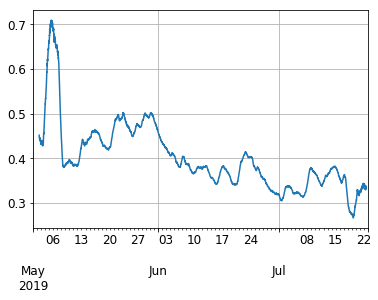

In [35]:
#crns20c[ids].mean(axis=1).rolling("24H", min_periods=3*24-10).mean().plot()
test = crns20c[attrs.index[attrs.hasdata]].mean(axis=1).rolling("24H", min_periods=3*24-10).mean()
cs.core.n_to_theta_desilets(test, n0=3000, rhob=1500).plot()
plt.grid()

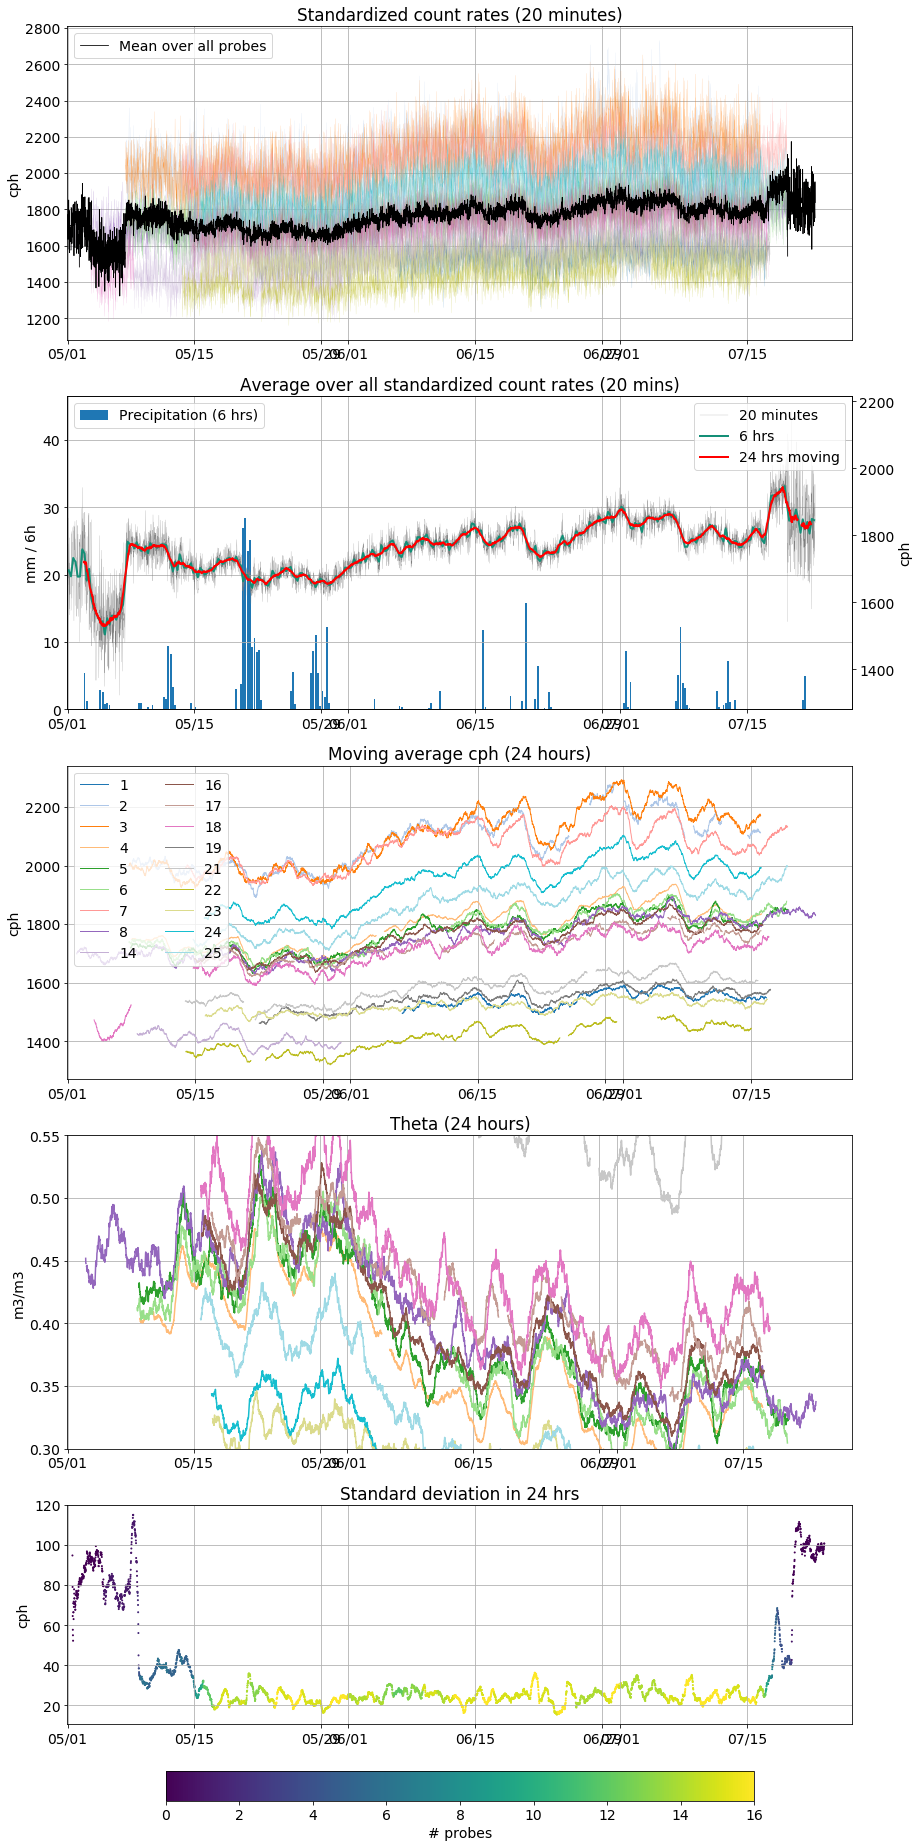

In [36]:
plt.rc('font', **{'size'   : 14})
ids = np.array(attrs[attrs.hasdata].id)
colors = plt.cm.tab20(np.linspace(0,1,len(ids)))

fig, ax = plt.subplots(nrows=5, figsize=(13,26))

plt.sca(ax[0])
for i, id in enumerate(ids):
    plt.plot(crns20c.index, crns20c[id], color=colors[i], lw=0.1)
mpl = plt.plot(crns20c.index, crns20c[ids].mean(axis=1), color="black", label="Mean over all probes", lw=0.8)
#plt.legend(ncol=2)
#plt.ylim(6500, 10000)
plt.grid()
plt.title("Standardized count rates (20 minutes)")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.legend(mpl, ["Mean over all probes"])
plt.ylabel("cph")

plt.sca(ax[1])

#plt.plot(prec["2019-05-01":].index, prec["2019-05-01":].depth.cumsum(), "--", color="black")
#plt.plot(meteo["2019-05-01":].index, meteo["2019-05-01":].precip.cumsum(), "--", color="blue")
#tmp = meteo.precip.resample("6H", loffset=dt.timedelta(hours=3)).sum()
tmp = prec.depth.resample("6H", loffset=dt.timedelta(hours=3)).sum()
plt.bar(tmp.index, tmp, linewidth=0, width=0.2,  label="Precipitation (6 hrs)")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("mm / 6h")

ax2 = ax[1].twinx()
plt.plot(crns20c.index, crns20c[ids].mean(axis=1), lw=0.2, color="grey", label="20 minutes")
tmp = crns20c[ids].mean(axis=1).resample("6H", closed="right", loffset=dt.timedelta(hours=3)).mean()
plt.plot(tmp.index, tmp, lw=2, label="6 hrs", color="#148f77")
#tmp = crns20c[ids].mean(axis=1).resample("24H", closed="right", loffset=dt.timedelta(hours=12)).mean()
#plt.plot(tmp.index, tmp, lw=2, label="24 hrs", color="#e67e22")
tmp = crns20c[ids].mean(axis=1).rolling("24H", min_periods=3*24-5).mean()
plt.plot(tmp.index-dt.timedelta(hours=12), tmp, lw=2, color="red", label="24 hrs moving")
plt.xlim(ax[0].get_xlim())
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
#plt.ylim(7600, 8600)
#plt.grid()
plt.legend(loc="upper right")
plt.title("Average over all standardized count rates (20 mins)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.ylabel("cph")

plt.sca(ax[2])
crns24hchst = crns20c.resample("24H").mean()
for i, id in enumerate(ids):
    tmp = crns20c[id].rolling("24H", min_periods=3*24-10).mean()
    plt.plot(tmp.index-dt.timedelta(hours=12), tmp, lw=1, color=colors[i], label=(str(id)))
    #plt.plot(crns24hchst.index+dt.timedelta(hours=12), crns24hchst[id], color=colors[i])
#plt.ylim(7600, 8800)
plt.grid()
plt.title("Moving average cph (24 hours)")
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.legend(ncol=2, loc="upper left")
plt.ylabel("cph")

plt.sca(ax[3])
for i, id in enumerate(ids):
    plt.plot(theta.index+dt.timedelta(hours=12), theta[id], color=colors[i])
plt.ylim(0.3, 0.55)
plt.grid()
plt.title("Theta (24 hours)")
plt.ylabel("m3/m3")
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
#plt.legend(ncol=2, labelspacing=0.2)


plt.sca(ax[4])
#tmp = crns20c[ids[1:]].mean(axis=1).resample("24H").std()
tmp = crns20c[ids].mean(axis=1).rolling("24H").std()
tmp2 = crns20c[ids].count(axis=1).rolling("24H").min()
cp = plt.scatter(tmp.index + dt.timedelta(hours=12), tmp, c=np.array(tmp2), s=1)
cb = plt.colorbar(cp, orientation="horizontal", shrink=0.75)
cb.set_label("# probes")
plt.xlim(ax[0].get_xlim())
ax[4].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.grid()
plt.title("Standard deviation in 24 hrs")
plt.ylabel("cph")


plt.tight_layout()

plt.rc('font', **{'size'   : 14})
colors = plt.cm.tab20(np.linspace(0,1,len(ids)))

fig, ax = plt.subplots(nrows=5, figsize=(13,26))

plt.sca(ax[0])
for i, id in enumerate(ids):
    plt.plot(crns20cst.index, crns20cst[id], color=colors[i], lw=0.1)
mpl = plt.plot(crns20cst.index, crns20cst[ids].mean(axis=1), color="black", label="Mean over all probes", lw=0.8)
#plt.legend(ncol=2)
plt.ylim(6500, 10000)
plt.grid()
plt.title("Standardized count rates (20 minutes)")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.legend(mpl, ["Mean over all probes"])
plt.ylabel("cph")

plt.sca(ax[1])

#plt.plot(prec["2019-05-01":].index, prec["2019-05-01":].depth.cumsum(), "--", color="black")
#plt.plot(meteo["2019-05-01":].index, meteo["2019-05-01":].precip.cumsum(), "--", color="blue")
#tmp = meteo.precip.resample("6H", loffset=dt.timedelta(hours=3)).sum()
tmp = prec.depth.resample("6H", loffset=dt.timedelta(hours=3)).sum()
plt.bar(tmp.index, tmp, linewidth=0, width=0.2,  label="Precipitation (6 hrs)")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("mm / 6h")

ax2 = ax[1].twinx()
plt.plot(crns20cst.index, crns20cst[ids].mean(axis=1), lw=0.2, color="grey", label="20 minutes")
tmp = crns20cst[ids].mean(axis=1).resample("6H", closed="right", loffset=dt.timedelta(hours=3)).mean()
plt.plot(tmp.index, tmp, lw=2, label="6 hrs", color="#148f77")
#tmp = crns20cst[ids].mean(axis=1).resample("24H", closed="right", loffset=dt.timedelta(hours=12)).mean()
#plt.plot(tmp.index, tmp, lw=2, label="24 hrs", color="#e67e22")
tmp = crns20cst[ids].mean(axis=1).rolling("24H", min_periods=3*24-5).mean()
plt.plot(tmp.index-dt.timedelta(hours=12), tmp, lw=2, color="red", label="24 hrs moving")
plt.xlim(ax[0].get_xlim())
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.ylim(7600, 8600)
#plt.grid()
plt.legend(loc="upper right")
plt.title("Average over all standardized count rates (20 mins)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.ylabel("cph")

plt.sca(ax[2])
crns24hchst = crns20cst.resample("24H").mean()
for i, id in enumerate(ids):
    tmp = crns20cst[id].rolling("24H", min_periods=3*24-10).mean()
    plt.plot(tmp.index-dt.timedelta(hours=12), tmp, lw=1, color=colors[i], label=(str(id)))
    #plt.plot(crns24hchst.index+dt.timedelta(hours=12), crns24hchst[id], color=colors[i])
plt.ylim(7600, 8800)
plt.grid()
plt.title("Moving average cph (24 hours)")
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.legend(ncol=2, loc="upper left")
plt.ylabel("cph")

plt.sca(ax[3])
for i, id in enumerate(ids):
    plt.plot(theta.index+dt.timedelta(hours=12), theta[id], color=colors[i])
plt.ylim(0.3, 0.55)
plt.grid()
plt.title("Theta (24 hours)")
plt.ylabel("m3/m3")
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
#plt.legend(ncol=2, labelspacing=0.2)


plt.sca(ax[4])
#tmp = crns20cst[ids[1:]].mean(axis=1).resample("24H").std()
tmp = crns20cst[ids].mean(axis=1).rolling("24H").std()
tmp2 = crns20cst[ids].count(axis=1).rolling("24H").min()
cp = plt.scatter(tmp.index + dt.timedelta(hours=12), tmp, c=np.array(tmp2), s=1)
cb = plt.colorbar(cp, orientation="horizontal", shrink=0.75)
cb.set_label("# probes")
plt.xlim(ax[0].get_xlim())
ax[4].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xlim(min_dtime-dt.timedelta(hours=1), None)
plt.grid()
plt.title("Standard deviation in 24 hrs")
plt.ylabel("cph")


plt.tight_layout()

## Get soil moisture data

In [142]:
import folium
from pyproj import Transformer
from scipy import spatial
from matplotlib.colors import rgb2hex

In [38]:
transformer = Transformer.from_crs(4326, 32632, always_xy=True)

In [195]:
locs = pd.read_excel("/media/x/cosmicsense/data/fendt/theta_sheet_merged_prelim.xlsx", sheet_name="locations")
locs = locs.set_index(locs.columns[0])

In [196]:
cyls = pd.read_excel("/media/x/cosmicsense/data/fendt/TERENO Pre-Alpine Soil water content data.xlsx", 
                     sheet_name="Tabelle2")

In [197]:
cyls.columns
cyls["locid"] = [int(item.split(".")[0]) for item in cyls['Number of sample (bags)'] ]

In [198]:
cyls

,Number of sample (bags),weight container,dry weight soil+container after 105°C,freshweight,dry weight soil after 105°C,gravimetric water content (g/g soil (DW)),volumetric water content (vol%),BD (g/cm³),poro (vol%),wfps (vol%),locid
0,101.0.1,1.98,57.75,89.4,55.77,0.603012,0.3363,0.5577,0.789547,0.425940,101
1,101.0.2,2.52,61.30,97.77,58.78,0.663321,0.3899,0.5878,0.778189,0.501035,101
2,101.1.1,1.77,93.47,138.49,91.70,0.510251,0.4679,0.9170,0.653962,0.715485,101
3,101.1.2,2.40,82.54,118.01,80.14,0.472548,0.3787,0.8014,0.697585,0.542873,101
4,101.2.1,2.13,116.81,166.9,114.68,0.455354,0.5222,1.1468,0.567245,0.920589,101
5,101.2.2,2.75,113.10,159.67,110.35,0.446942,0.4932,1.1035,0.583585,0.845121,101
6,101.3.1,2.31,136.43,202.48,134.12,0.509693,0.6836,1.3412,0.493887,1.384123,101
7,101.3.2,2.39,89.82,131.31,87.43,0.501887,0.4388,0.8743,0.670075,0.654852,101
8,101.4.1,2.29,76.84,132.45,74.55,0.776660,0.5790,0.7455,0.718679,0.805645,101
9,101.4.2,2.23,81.50,140.88,79.27,0.777217,0.6161,0.7927,0.700868,0.879053,101


### Assign results from cylinder analysis to CRNS probes

In [199]:
attrs["x"], attrs["y"] = transformer.transform(attrs.lon.tolist(), attrs.lat.tolist())
locs["x"], locs["y"] = transformer.transform(locs.long_dgps.tolist(), locs.lat_dgps.tolist())
#plt.plot(attrs["x"], attrs["y"], "bo")
#plt.plot(locs["x"], locs["y"], "r+")

In [202]:
points = np.array([attrs.x, attrs.y]).T
tree = spatial.KDTree(points)
#within = tree.query_ball_point(np.array([locs.x, locs.y]).T, 20)
nextdist, nextix = tree.query(np.array([locs.x, locs.y]).T, k=1)
locs["crnsid"] = attrs.index[nextix]

In [212]:
# Assign cylinder location ID to each CRNS in attribute table
attrs["cylid"] = -9999
for locid in np.unique(cyls["locid"]):
    attrs.loc[locs.loc[locid, "crnsid"], "cylid"] = locid
# Assign cylinder stats to each CRNS in attribute table
attrs["rhob"] = np.nan
attrs["theta"] = np.nan
attrs["poro"] = np.nan

In [213]:
cyls.columns

Index(['Number of sample (bags)', 'weight container',
       'dry weight soil+container after 105°C', 'freshweight',
       'dry weight soil after 105°C',
       'gravimetric water content (g/g soil (DW))',
       'volumetric water content (vol%)', 'BD (g/cm³)', 'poro (vol%)',
       'wfps (vol%)', 'locid'],
      dtype='object')

In [216]:
depths = 6
reps = 2

In [222]:
cyls[cyls["locid"]==101]

,Number of sample (bags),weight container,dry weight soil+container after 105°C,freshweight,dry weight soil after 105°C,gravimetric water content (g/g soil (DW)),volumetric water content (vol%),BD (g/cm³),poro (vol%),wfps (vol%),locid
0,101.0.1,1.98,57.75,89.4,55.77,0.603012,0.3363,0.5577,0.789547,0.425940,101
1,101.0.2,2.52,61.30,97.77,58.78,0.663321,0.3899,0.5878,0.778189,0.501035,101
2,101.1.1,1.77,93.47,138.49,91.70,0.510251,0.4679,0.9170,0.653962,0.715485,101
3,101.1.2,2.40,82.54,118.01,80.14,0.472548,0.3787,0.8014,0.697585,0.542873,101
4,101.2.1,2.13,116.81,166.9,114.68,0.455354,0.5222,1.1468,0.567245,0.920589,101
5,101.2.2,2.75,113.10,159.67,110.35,0.446942,0.4932,1.1035,0.583585,0.845121,101
6,101.3.1,2.31,136.43,202.48,134.12,0.509693,0.6836,1.3412,0.493887,1.384123,101
7,101.3.2,2.39,89.82,131.31,87.43,0.501887,0.4388,0.8743,0.670075,0.654852,101
8,101.4.1,2.29,76.84,132.45,74.55,0.776660,0.5790,0.7455,0.718679,0.805645,101
9,101.4.2,2.23,81.50,140.88,79.27,0.777217,0.6161,0.7927,0.700868,0.879053,101


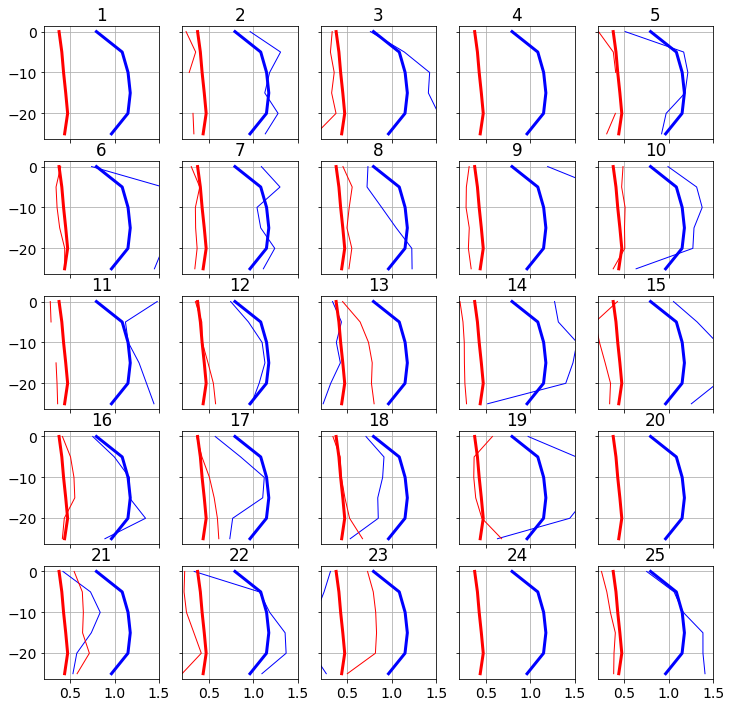

In [290]:
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(12,12), sharex=True, sharey=True)
ax = ax.ravel()
depthy = -np.arange(0,30,5)
#colors = [rgb2hex(col) for col in plt.cm.nipy_spectral(np.linspace(0,1,len(attrs.index)))]
#colors = plt.cm.tab20(np.linspace(0,1,len(attrs.index)))
allbd = []
alltheta = []
for i, id in enumerate(attrs.index):
    if id in [4,20,1, 24]:
        continue
    locid = attrs.loc[id, "cylid"]
    #print(id, locid)
    locdata = cyls[cyls["locid"]==locid]
    locbd = np.array(locdata["BD (g/cm³)"]).reshape((-1,2))
    loctheta = np.array(locdata["volumetric water content (vol%)"]).reshape((-1,2))
    locporo = np.array(locdata["poro (vol%)"]).reshape((-1,2))
    #locbd = locbd / locbd.max()
    #print(locbd)
    ax[i].plot(locbd[0:6].mean(axis=1), depthy, lw=1, color="blue")
    ax[i].plot(loctheta[0:6].mean(axis=1), depthy, lw=1, color="red")
    #ax[i].plot(locbd[0:6,1], depthy, lw=1 )
    allbd.append(locbd[0:6])
    alltheta.append(loctheta[0:6])
    attrs.loc[id, "rhb"] = locbd[0:6].mean()
    attrs.loc[id, "poro"] = locporo[0:6].mean()
    attrs.loc[id, "theta"] = loctheta[0:6].mean()

meanbd = np.array(allbd).mean(axis=(0,2))
meantheta = np.nanmean( np.array(alltheta), axis=(0,2))
for i, id in enumerate(attrs.index):
    ax[i].plot(meanbd, depthy, "blue", lw=3)
    ax[i].plot(meantheta, depthy, "red", lw=3)
    ax[i].set_title(str(id))
    ax[i].set_xlim(0.2, 1.5)
    ax[i].grid()

#plt.legend(ncol=2)


In [272]:
len(ax)

5

ValueError: setting an array element with a sequence.

<Figure size 432x288 with 0 Axes>

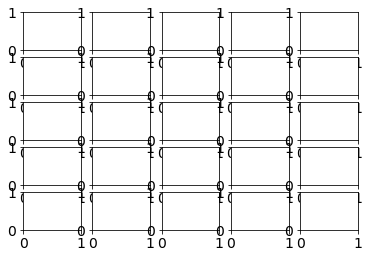

In [218]:
    bd = np.ones(shape=(reps, depths))*np.nan
    for rep in range(reps):
        for depth in range(depths):
            sampleid = "%d.%d.%d" % (locid, depth, rep+1)
            bd[rep, depth] = cyls[cyls['Number of sample (bags)']==sampleid]["BD (g/cm³)"]
    

In [270]:
len(ax[0])

TypeError: object of type 'Figure' has no len()

In [221]:
rep, depth, sampleid, cyls[cyls['Number of sample (bags)']==sampleid]["BD (g/cm³)"]

(0, 1, '345.1.1', Series([], Name: BD (g/cm³), dtype: float64))

In [205]:
m = folium.Map(location=[47.828835, 11.065808], zoom_start=15, tiles="Stamen Toner")
colors = [rgb2hex(col) for col in plt.cm.nipy_spectral(np.linspace(0,1,len(attrs.index)))]
for id in attrs.index:
    folium.Circle(location=[attrs.loc[id].lat, attrs.loc[id].lon], radius=10, color="black", fill_color="black", fill_opacity=0.9, weight=1).add_to(m)

for id in locs.index:
    if id in cyls.locid:
        color = "blue"#colors[np.where(attrs.index==locs.loc[id,"crnsid"])[0][0]]
    else:
        color="blue"
    #print(color)
    folium.Circle(location=[locs.loc[id].lat_dgps, locs.loc[id].long_dgps], radius=5,
                  color=color, fill_color=None, fill_opacity=0.9, weight=2).add_to(m)

for id in np.unique(cyls.locid):
    try:
        folium.Circle(location=[locs.loc[id].lat_dgps, locs.loc[id].long_dgps], radius=5,
                      color="red", fill_color=None, fill_opacity=0.9, weight=2).add_to(m)
    except KeyError:
        print(id)
m

In [186]:
locs.loc[np.unique(cyls.locid)]

/home/maik/miniconda3/envs/cosmic-sense/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,lat_gps,long_gps,datetime_gps,datetime_manual,lat_dgps,long_dgps,datetime_dgps,accuracy_dgps,remarks_dgps,FDR-readings (yes/no),cylinder samples (yes/no),remarks,x,y,crnsid
location_id (<group-id><counter>),,,,,,,,,,,,,,,
101,NaN,NaN,NaN,NaT,47.83317,11.06210,2019-06-25T09:21:48.000,2.0,W,NaN,NaN,NaN,654315.417566,5.299817e+06,17.0
106,NaN,NaN,NaN,2019-06-25 10:50:00,47.83248,11.06048,2019-06-25T10:37:57.000,0.0,W,NaN,NaN,NaN,654196.236288,5.299737e+06,8.0
111,NaN,NaN,NaN,2019-06-25 12:10:00,47.83221,11.05952,2019-06-25T10:46:57.000,0.0,W,NaN,NaN,NaN,654125.197399,5.299705e+06,25.0
116,NaN,NaN,NaN,2019-06-25 13:35:00,47.83168,11.05948,2019-06-25T14:06:57.000,0.0,W,NaN,NaN,NaN,654123.774016,5.299646e+06,3.0
126,NaN,NaN,NaN,2019-06-25 17:30:00,47.83155,11.06315,2019-06-26T14:06:07.000,6.0,W,NaN,NaN,NaN,654398.797244,5.299639e+06,18.0
131,NaN,NaN,NaN,2019-06-26 10:35:00,47.82998,11.06292,2019-06-27T07:44:07.000,0.0,W,NaN,NaN,NaN,654386.243765,5.299464e+06,12.0
136,NaN,NaN,NaN,2019-06-26 12:00:00,47.83052,11.06024,2019-06-27T07:37:05.000,0.0,W,NaN,NaN,NaN,654184.084428,5.299518e+06,24.0
209,NaN,NaN,NaN,2019-06-25 13:00:00,47.83242,11.06615,2019-06-25T11:14:33.000,2.0,W,no,yes,NaN,654620.711679,5.299741e+06,23.0
218,NaN,NaN,NaN,2019-06-25 18:00:00,47.83167,11.06882,2019-06-26T11:52:30.000,0.0,W,no,yes,NaN,654822.744789,5.299663e+06,14.0


In [139]:
color

array([[0.07320784, 0.        , 0.0836549 , 1.        ]])

In [ ]:
plt.figure(figsize=(10,10))
for i, id in enumerate(attrs.id):
    plt.plot(attrs.loc[id].lon, attrs.loc[id].lat, "o")
    plt.text(attrs.loc[id].lon, attrs.loc[id].lat, str(id))